<a href="https://colab.research.google.com/github/Shuaynat/DSE-23-24/blob/main/06-classes/DS23_ICEF_class6_boostrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science in Economics

### Class -6 Bootstrap hypithesis testing

12/10/23


<fieldset>
  <legend><font color="#282FA4 "><b>Class plan</b></font></legend>

Part 1: Bootstrap theory



Part 2: Text
<div>
    <input type="checkbox" id="point1" name="point1"/>
    <label for="scales"> Comparison: CatBoost, XGBoost, LightGMB</label>
  </div>

Part 3: Text






</fieldset>

## Bootstrap Theory

![Bootstrap](https://raw.githubusercontent.com/SchattenGenie/pic-storage/master/bootstrap.png)

![https://towardsdatascience.com/an-introduction-to-the-bootstrap-method-58bcb51b4d60](https://miro.medium.com/max/700/1*iH5w0MBdiOlxDOCX6nmqqw.png)


**Example:Bootstrap estimate of a variance**

Consider random sample $X = \{x_i\}_{i=1}^{n}$ from unknown distribution, and some nnice function $T_n(X)$. We want to estimate variance $V_F(T_n)$.



**Approach 1: Non-parametric booststrap**


  1. Generate B sampls with replacement from the original sample: $X_1^*, X_2^*, X_B^* \sim X$
  2. Calculate value of the function $T_1^*, ..., T_B^*$
  3. $$V_F(T_n) \approx v_{boot} = \frac{1}{B - 1} \sum\limits_{b=1}^B \left(T_b^* - \bar{T}^*  \right)^2$$
  
  

**Approach 2: Parametric booststrap**

1. Find parameters of the distribution of X via Maximum Likelihood method
2. Generate B sample from this fitted distribution (not from the original sample)
3. Reapeat steps 2,3 from the Non-parametric boostrap

## Non- parametric Bootstrap

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tqdm import tqdm
%matplotlib inline

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Shuaynat/DSE-23-24/main/01-classes/flats_moscow.csv')

(array([1.078e+03, 7.990e+02, 1.100e+02, 2.500e+01, 1.500e+01, 7.000e+00,
        4.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 50., 118., 186., 254., 322., 390., 458., 526., 594., 662., 730.]),
 <BarContainer object of 10 artists>)

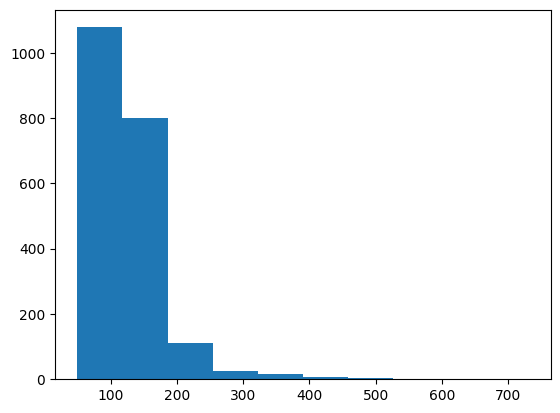

In [ ]:
X = df['price'].valuesz
plt.hist(X)

#### Case 1. Bootstrap variance of the mean price

In [ ]:
N = len(X)
B = 5000
Xb = np.random.choice(X, (B, N), replace=True)

Variance of price = 1.148321533075461, Bootstrap variance of the mean price = 1.1263577907615743.


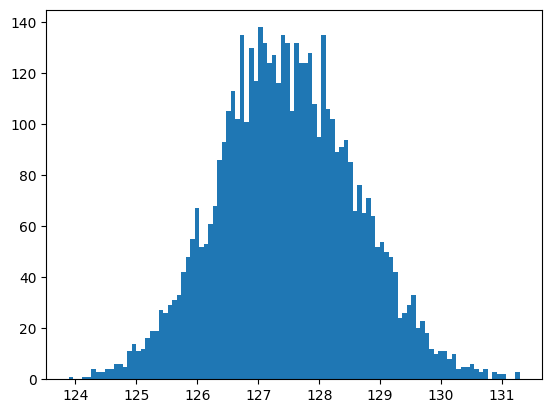

In [ ]:
## Estimate variance of the mean price

T = lambda x: np.mean(x, axis=1)
plt.hist(T(Xb), bins=100)

print("Variance of price = {},\
 Bootstrap variance of the mean price = {}.".format(np.std(X) / np.sqrt(len(X)), np.std(T(Xb))))


#### Case 2. Bootstrap variance of the median price

Bootstrap variance of the median price = 0.4309625389752571.


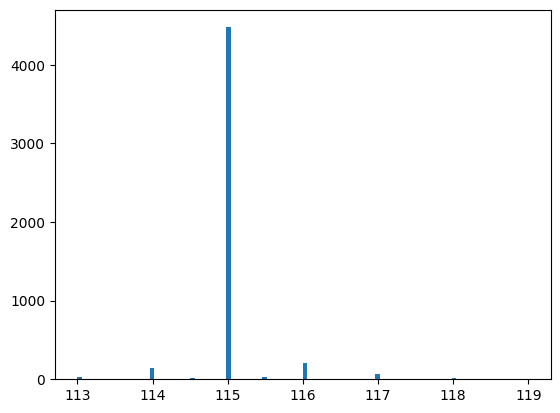

In [ ]:
T = lambda x: np.median(x, axis=1)
plt.hist(T(Xb), bins=100)

print("Bootstrap variance of the median price = {}.".format(np.std(T(Xb))))

## Parametric bootstrap for time-series


  1. Train some model for the prediction of time-series:
  $$y_t = \beta_0 + \beta_1 y_{t-1} + \beta_2 y_{t-2}$$
  2. Get residuals from the data:
  $$\hat{\epsilon} = y_t - (\beta_0 + \beta_1 y_{t-1} + \beta_2 y_{t-2})$$
  3. Generate new samples as predictions of the model plus random residuals:
  $$\hat{y_t} = \beta_0 + \beta_1 \hat{y}_{t-1} + \beta_2 \hat{y}_{t-2} + (\epsilon \sim \hat{\epsilon}) $$
  
  
https://onlinecourses.science.psu.edu/stat501/node/358/

In [ ]:
from datetime import datetime
import yfinance as yf

In [ ]:
from sklearn import linear_model
import pandas as pd

clf = linear_model.LinearRegression(fit_intercept=False)

def make_regression_from_timeseries(X, n):
    """
    X: 1D-numpy массив временных данных
    n: количество сэмплов для предсказания
    return: X, Y = [x_{t-n}, x_{t-n+1}, ..., x_{t-1}], x_{t}
    """
    N = len(X)
    x = np.zeros((N - n, n))
    y = np.zeros((N - n, 1))

    for i in range(N-n):
        x[i,:] = X[i: i+n]
        y[i] = X[i+n]

    return x,y
def bootstrap_timeseries(clf, xinit, residuals, N):
    n = len(xinit)
    bootstrap_sample = []
    current_sample = xinit
    for i in range(N):
        new_dot = clf.predict([current_sample]).ravel()[0] + np.random.choice(residuals)
        bootstrap_sample.append(new_dot)
        current_sample = np.roll(current_sample, -1)
        current_sample[-1] = new_dot
    return bootstrap_sample

n = 3 # autoregression of the first order



[*********************100%%**********************]  1 of 1 completed


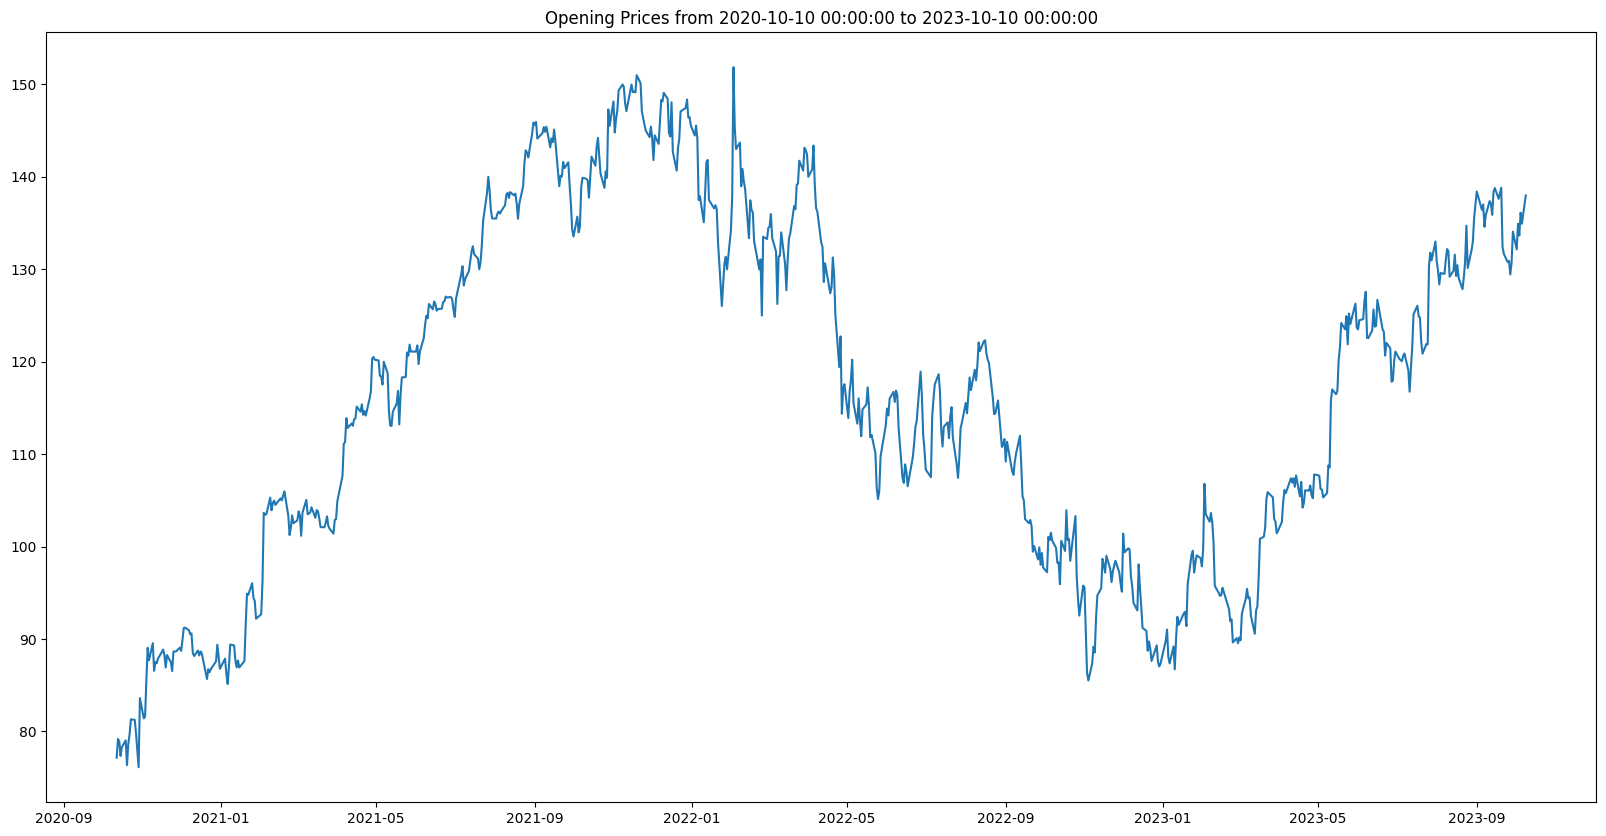

In [ ]:
# initialize parameters
start_date = datetime(2020, 10, 10)
end_date = datetime(2023, 10, 10)

# get the data
data = yf.download('GOOG', start = start_date,
                   end = end_date) # Get historical data on Goolge stock

# display
plt.figure(figsize = (20,10))
plt.title('Opening Prices from {} to {}'.format(start_date,
                                                end_date))
plt.plot(data['Open'])
plt.show()

In [ ]:
data = data['Open']
data_mean = data.mean()
data = data - data_mean
# Create sample for learning
X, Y = make_regression_from_timeseries(data.ravel(), n)

clf.fit(X, Y)

beta_hat = clf.coef_
print(beta_hat)



LinearRegression(fit_intercept=False)

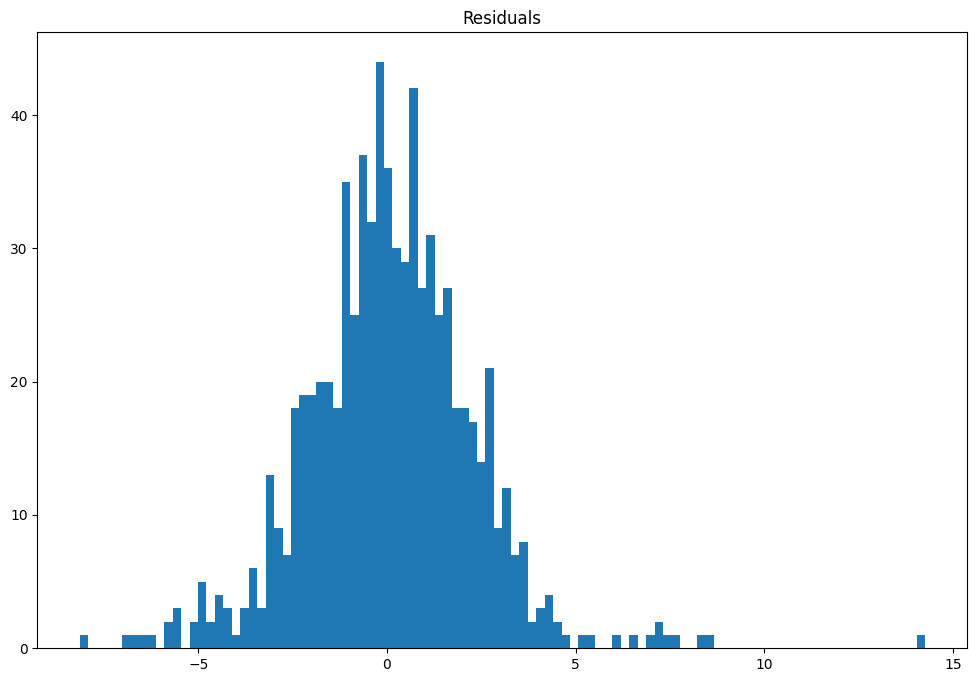

In [ ]:
# Get resifduals
residuals = Y.ravel() - clf.predict(X).ravel()


# Aim to see normally distributed errors
plt.figure(figsize=(12, 8))
plt.title('Residuals')
plt.hist(residuals, bins=100);
plt.show()

In [ ]:
# Bootstrap estimate of regression coefficients
beta_boots = []
B = 100
for i in tqdm(range(B)):
    bootstraped_data = bootstrap_timeseries(clf, X[0, :], residuals, len(data))
    X_boot, Y_boot = make_regression_from_timeseries(bootstraped_data, n)
    beta_boots.append(clf.fit(X_boot, Y_boot).coef_)
beta_boots = np.concatenate(beta_boots)

100%|██████████| 100/100 [00:19<00:00,  5.02it/s]


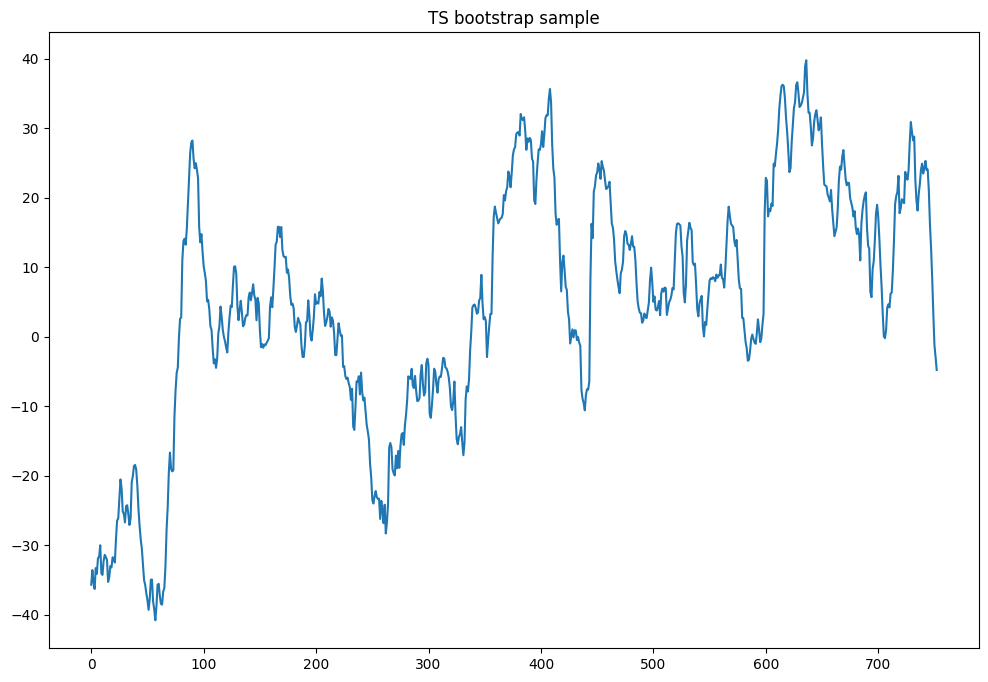

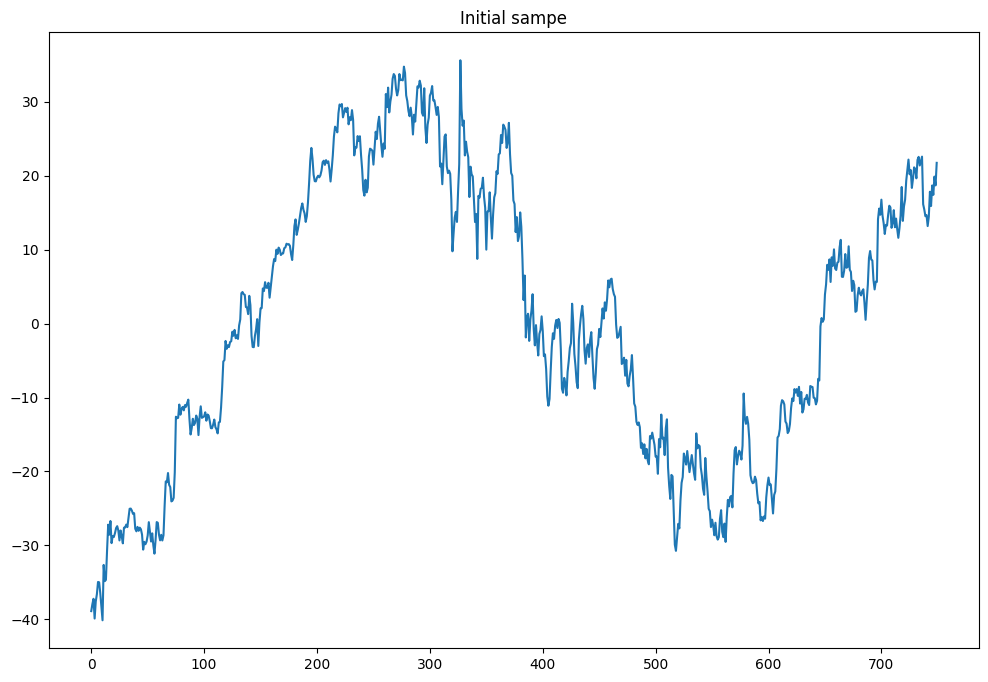

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('TS bootstrap sample')
plt.plot(bootstraped_data + data_mean)
plt.show()

plt.figure(figsize=(12, 8))
plt.title('Initial sampe')
plt.plot(Y + data_mean)
plt.show()

### Bootstrap for Darvin

In 1878, Charles Darwin recorded some data on the height
of Zea mays plants to determine what effect cross-pollination or self-pollination has on the height of Zea mays. 15 experiments were conducted, during which one cross-pollinated and one self-pollinated plants were grown
in one pot, and then their height was measured.
The data is presented as a set of 15 pairs $(Y_1, Z_1), . . .,(Y_{15}, Z_{15})$, where $Y_i$ and $Z_i$.
are the height of the cross–pollinated and self-pollinated plant in the i pot, respectively

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("https://raw.githubusercontent.com/limph0nimph/DSE-23-24/main/06-classes/Darwin_data.csv")
diff = (data["Cross (Y)"] - data["Self (Z)"]).to_numpy()


Your task: to test the hypothesis $H_0 : E[Z_i
] = E[Y_i
]$ (against the alternative
$H_A : E[Z_i
] \neq E[Y_i
])$ at the significance level $α = 0.05$.


Due to the same growing environment,$ Y_i$ and $Z_i$ will be dependent random variables, but for different $i, j ∈ {1, . . . , 15}$ two-dimensional vectors $(Y_i, Z_i)$ and
$(Y_j
, Z_j )$ can be considered independent. Let's denote the difference in plant heights ($Y_i−Z_i)$
by $X_i$
. Due to the independence of random vectors $(Y_1, Z_1), . . .,(Y_{15}, Z_{15})$, the set
$(X_1, . . . , X_15)$ forms a simple random iid sample.
To test the desired hypothesis, it is necessary to use a confidence
the interval for $E[X_i
]$, based on **bootstrap** (using percentiles).

In [ ]:
def bootstrap_and_calc_means(X, B):
    '''
     Do bootstrap with B iterations and return the averages of the resulting samples

     Parametrs:
        X:
            np.ndarray with sample
        B:
            number of sample regenerations

     Return value:
        Averages of the  geberating samples
    '''

    samples = np.random.choice(X, size=(B, X.shape[0]))
    return samples.mean(axis=1)

This scheme for constructing the γ-confidence interval looks like this.
*  For b = 1, . . . , B regenerate $X_{b_
1}, . . . , X_{b_n}$
from the sample $X_1, . . . , X_n$ with returns.
*  Construct estimates of the average $X_b$ for all $b = 1, . . . , B$.
* Calculate confindence interval based on percentilis of boostrap sample
Use B = 10000 regenerations


Draw conclusions: what is the biological interpretation of your result?



In [ ]:
def get_bootstrap_confidence_interval(diff, B, gamma):
    '''
     Return confidence interval of expectation of means of two random variables

     Parametrs:
        name:
            string -- name of file .csv extension with values of two random
            variables in "Cross (Y)" column and "Self (Z)" column
         B:
            number of sample regenerations
        gamma:
            сonfidence interval length

     Return values:
        (left, right) -- ends of the confidence interval
    '''


    means = bootstrap_and_calc_means(diff, B)
    plt.hist(means)
    plt.xlabel("difference")
    plt.title("Boostrap sample")
    plt.show
    return (np.quantile(means, (1 - gamma) / 2.0), np.quantile(means, (1 + gamma) / 2.0))

(0.6164583333333352, 5.958333333333333)

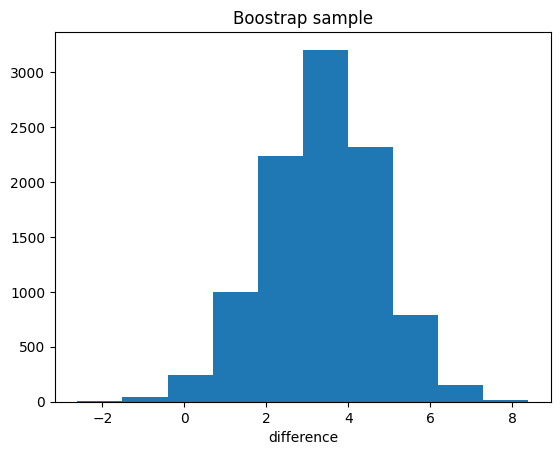

In [ ]:
get_bootstrap_confidence_interval(diff, 10000, 0.95)